In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install tldextract
!pip install python-whois

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-whois: filename=python_whois-0.8.0-py3-none-any.whl size=103247 sha256=341994d14a129ac12c3e07da3e0d07a67cc7c9ed93e7451b2bc20069bbb2bf05
  Stored in directory: /root/.cache/pip/wheels/10/f1/87/145023b9a206e2e948be6480c61ef3fd3dbb81ef11b6977782
Successfully built python-whois


In [2]:
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam

import whois
from bs4 import BeautifulSoup
import features as fe
import re
from urllib.parse import urlparse
import urllib
from datetime import datetime, date
import time
import requests

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head(20)

,url,status,is_ip,length_url,length_hostname,tiny_url,CountAtSign,CountQuestionMark,CountHyphen,CountDot,...,avg_row_words_host,avg_row_words_path,longest_words_raw,longest_word_host,longest_word_path,shortest_words_raw,shortest_word_host,shortest_word_path,webTraffic,whoisRegistered
0,http://www.crestonwood.com/router.php,legitimate,0,37,19,0,0,0,0,3,...,7.0,4.500000,11,11,6,3,3,3,0,1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,0,77,23,0,0,0,0,1,...,19.0,14.666667,32,19,32,2,19,2,0,1
2,https://support-appleld.com.secureupdate.duila...,phishing,0,126,50,0,0,1,1,4,...,8.4,8.142857,17,13,17,2,3,2,0,1
3,http://rgipt.ac.in,legitimate,0,18,11,0,0,0,0,2,...,5.0,0.000000,5,5,0,5,5,0,14064,1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,0,55,15,0,0,0,2,2,...,5.0,7.000000,11,7,11,3,3,4,236847,1
5,http://appleid.apple.com-app.es/,phishing,0,32,24,0,0,0,1,3,...,4.5,0.000000,7,7,0,3,3,0,0,0
6,http://www.mutuo.it,legitimate,0,19,12,0,0,0,0,2,...,4.0,0.000000,5,5,0,3,3,0,0,1
7,http://www.shadetreetechnology.com/V4/validati...,phishing,0,81,27,0,0,0,0,2,...,11.0,14.666667,32,19,32,2,3,2,0,1
8,http://vamoaestudiarmedicina.blogspot.com/,legitimate,0,42,34,1,0,0,0,2,...,14.5,0.000000,21,21,0,8,8,0,0,0
9,https://parade.com/425836/joshwigler/the-amazi...,legitimate,0,104,10,0,0,0,10,1,...,6.0,5.538462,10,6,10,2,6,2,333766523,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11449 entries, 0 to 11448
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  11449 non-null  object 
 1   status               11449 non-null  object 
 2   is_ip                11449 non-null  int64  
 3   length_url           11449 non-null  int64  
 4   length_hostname      11449 non-null  int64  
 5   tiny_url             11449 non-null  int64  
 6   CountAtSign          11449 non-null  int64  
 7   CountQuestionMark    11449 non-null  int64  
 8   CountHyphen          11449 non-null  int64  
 9   CountDot             11449 non-null  int64  
 10  CountComma           11449 non-null  int64  
 11  CountSemicolon       11449 non-null  int64  
 12  CountDollar          11449 non-null  int64  
 13  CountAnd             11449 non-null  int64  
 14  CountSlash           11449 non-null  int64  
 15  have_redirect        11449 non-null 

**Sơ đồ phân bố dữ liệu của một số đặc trưng**

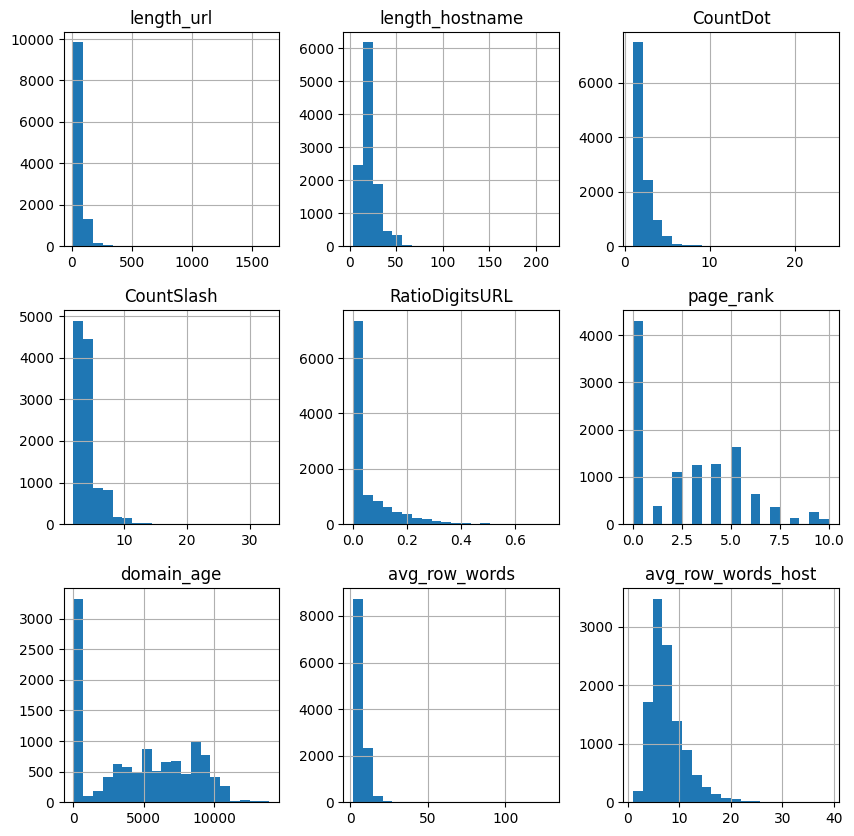

In [8]:
labels=["length_url","length_hostname","CountDot","CountSlash","RatioDigitsURL","page_rank","domain_age","avg_row_words","avg_row_words_host"]
#Plotting the data distribution
data[labels].hist(bins = 20,figsize = (10,10))
plt.show()

**Ma trận tương quan**

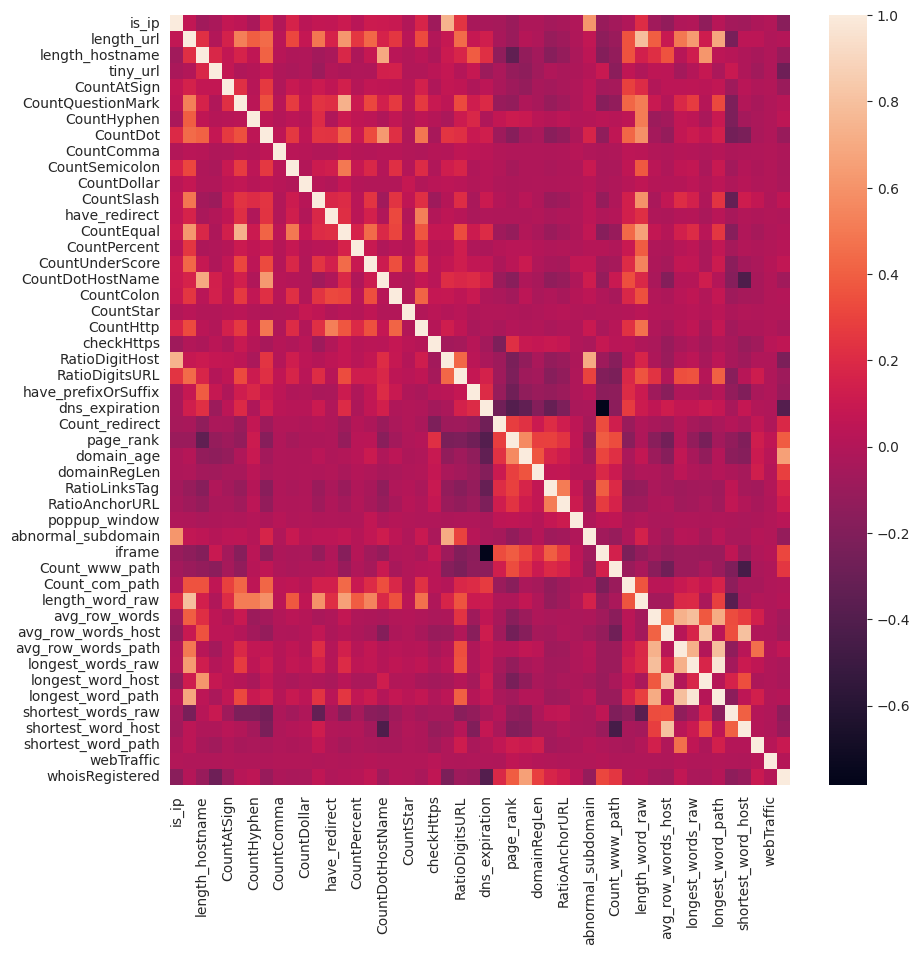

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data[data.columns[2:]].corr())
plt.show()

In [5]:
count = data.status.value_counts()

In [6]:
x = count.index
x

Index(['legitimate', 'phishing'], dtype='object')

Text(0, 0.5, 'Count')

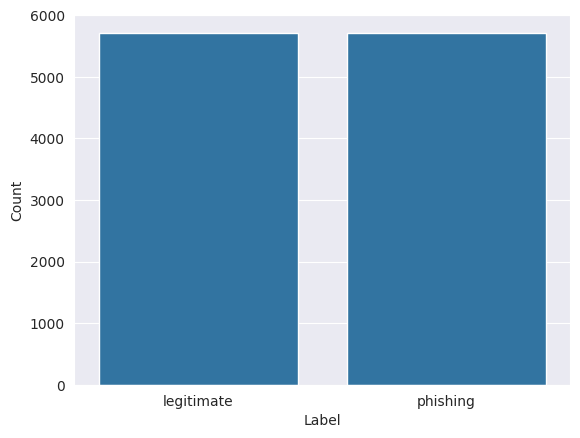

In [ ]:
sns.barplot(x=count.index, y=count)
plt.xlabel('Label')
plt.ylabel('Count')

In [5]:
data['status'] = data['status'].map({'phishing': 1, 'legitimate': 0})

In [6]:
X = data.drop(['url', 'status'], axis=1).values
y = data['status'].values

#Train model

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale data

In [9]:
# scaler_train= MinMaxScaler()
# # fit scaler into data
# scaler_train.fit(X_train)
# # # start scale
# X_train = scaler_train.transform(X_train)

scaler = MinMaxScaler()
scaler.fit(X_train)

# Chuẩn hóa tập train
train_data_normalized = scaler.transform(X_train)
print("Train data normalized:")
print(train_data_normalized)

test_data_normalized = scaler.transform(X_test)


Train data normalized:
[[0.         0.01657459 0.06666667 ... 0.15       0.         1.        ]
 [0.         0.00613874 0.04285714 ... 0.         0.         0.        ]
 [0.         0.02701044 0.11428571 ... 0.025      0.         0.        ]
 ...
 [0.         0.01473297 0.07619048 ... 0.075      0.         0.        ]
 [0.         0.00859423 0.06190476 ... 0.         0.         0.        ]
 [0.         0.02823818 0.06190476 ... 0.05       0.         1.        ]]


In [8]:
scaler_test = MinMaxScaler()
scaler_test.fit(X_test)
X_test = scaler_test.transform(X_test)


#Store result

In [10]:
model_list = []
accuracy_list = []
f1_score_list = []
recall_list = []
precision_list = []

def set_result(model, acc, f1, recall, precision):
  model_list.append(model)
  accuracy_list.append(round(acc,3))
  f1_score_list.append(round(f1,3))
  recall_list.append(round(recall,3))
  precision_list.append(round(precision,3))

#Neural Network

In [11]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(49,)))  # hidden layer with 128 neural
model.add(Dense(64, activation='relu'))  # another hidden layer with 64 neural
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # output layer with 1 neural

In [12]:
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(train_data_normalized, y_train, epochs=30, batch_size=32, verbose=2)

Epoch 1/30
287/287 - 2s - loss: 0.3229 - accuracy: 0.8677 - 2s/epoch - 6ms/step
Epoch 2/30
287/287 - 1s - loss: 0.2027 - accuracy: 0.9232 - 645ms/epoch - 2ms/step
Epoch 3/30
287/287 - 1s - loss: 0.1773 - accuracy: 0.9338 - 608ms/epoch - 2ms/step
Epoch 4/30
287/287 - 1s - loss: 0.1669 - accuracy: 0.9391 - 648ms/epoch - 2ms/step
Epoch 5/30
287/287 - 1s - loss: 0.1607 - accuracy: 0.9379 - 669ms/epoch - 2ms/step
Epoch 6/30
287/287 - 1s - loss: 0.1472 - accuracy: 0.9440 - 786ms/epoch - 3ms/step
Epoch 7/30
287/287 - 1s - loss: 0.1438 - accuracy: 0.9476 - 807ms/epoch - 3ms/step
Epoch 8/30
287/287 - 1s - loss: 0.1351 - accuracy: 0.9505 - 1s/epoch - 4ms/step
Epoch 9/30
287/287 - 1s - loss: 0.1343 - accuracy: 0.9515 - 1s/epoch - 4ms/step
Epoch 10/30
287/287 - 1s - loss: 0.1286 - accuracy: 0.9536 - 704ms/epoch - 2ms/step
Epoch 11/30
287/287 - 1s - loss: 0.1271 - accuracy: 0.9528 - 586ms/epoch - 2ms/step
Epoch 12/30
287/287 - 1s - loss: 0.1212 - accuracy: 0.9550 - 694ms/epoch - 2ms/step
Epoch 13/3

In [14]:
loss, accuracy = model.evaluate(test_data_normalized, y_test, verbose=0)
print("Loss:", loss)
print("Accuracy:", accuracy)

Loss: 0.1473272144794464
Accuracy: 0.9524017572402954


In [15]:
nn_pred = model.predict(test_data_normalized)

72/72 [==============================] - 0s 2ms/step


In [16]:
y_pred = np.round(nn_pred).astype(int)

In [17]:
y_pred = y_pred.reshape(-1)

In [18]:
pd.DataFrame({'y_test': y_test, 'predict': y_pred})

,y_test,predict
0,1,1
1,0,1
2,1,1
3,0,1
4,0,0
...,...,...
2285,1,1
2286,1,1
2287,0,1
2288,0,0


In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1139
           1       0.96      0.95      0.95      1151

    accuracy                           0.95      2290
   macro avg       0.95      0.95      0.95      2290
weighted avg       0.95      0.95      0.95      2290



In [20]:
acc_score_nn = accuracy_score(y_pred, y_test)
f1_score_nn = f1_score(y_pred, y_test)
recall_score_nn = recall_score(y_pred, y_test)
precision_score_nn = precision_score(y_pred, y_test)

In [21]:
set_result('NN', acc_score_nn, f1_score_nn, recall_score_nn, precision_score_nn)

#Random Forest

In [22]:
randomForest = RandomForestClassifier()
model_rf = randomForest.fit(train_data_normalized, y_train)

In [23]:
rf_predict = model_rf.predict(test_data_normalized)

In [24]:
pd.DataFrame({'y_test': y_test, 'predict': rf_predict})

,y_test,predict
0,1,1
1,0,1
2,1,1
3,0,1
4,0,0
...,...,...
2285,1,1
2286,1,1
2287,0,0
2288,0,0


In [25]:
acc_score_rf = accuracy_score(rf_predict, y_test)
f1_score_rf = f1_score(rf_predict, y_test)
recall_score_rf = recall_score(rf_predict, y_test)
precision_score_rf = precision_score(rf_predict, y_test)

In [26]:
print(classification_report(rf_predict, y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1137
           1       0.96      0.96      0.96      1153

    accuracy                           0.96      2290
   macro avg       0.96      0.96      0.96      2290
weighted avg       0.96      0.96      0.96      2290



In [27]:
set_result('RF', acc_score_rf, f1_score_rf, recall_score_rf, precision_score_rf)

#DescisionTree

In [28]:
dt = DecisionTreeClassifier(max_depth=26, min_samples_split=9, min_samples_leaf=4)

In [29]:
dt_model = dt.fit(train_data_normalized, y_train)

In [30]:
dt_predict = dt_model.predict(test_data_normalized)

In [31]:
pd.DataFrame({'y_test': y_test, 'predict': dt_predict})

,y_test,predict
0,1,1
1,0,1
2,1,1
3,0,1
4,0,0
...,...,...
2285,1,1
2286,1,1
2287,0,0
2288,0,0


In [32]:
print(classification_report(dt_predict, y_test))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1171
           1       0.92      0.95      0.93      1119

    accuracy                           0.93      2290
   macro avg       0.93      0.93      0.93      2290
weighted avg       0.93      0.93      0.93      2290



In [33]:
acc_score_dt = accuracy_score(dt_predict, y_test)
f1_score_dt = f1_score(dt_predict, y_test)
recall_score_dt = recall_score(dt_predict, y_test)
precision_score_dt = precision_score(dt_predict, y_test)

set_result('DT', acc_score_dt, f1_score_dt,
           recall_score_dt, precision_score_dt)

#Support vector machine

In [34]:
#linear kernel
linear_svm = SVC(kernel="linear")
linear_svm_model = linear_svm.fit(train_data_normalized, y_train)
linear_svm_predict = linear_svm_model.predict(test_data_normalized)

pd.DataFrame({'y_test': y_test, 'predict': linear_svm_predict})

print(classification_report(linear_svm_predict, y_test))

acc_score_svm_linear = accuracy_score(linear_svm_predict, y_test)
f1_score_svm_linear = f1_score(linear_svm_predict, y_test)
recall_score_svm_linear = recall_score(linear_svm_predict, y_test)
precision_score_svm_linear = precision_score(linear_svm_predict, y_test)

set_result('SVM_Linear', acc_score_svm_linear, f1_score_svm_linear,
           recall_score_svm_linear, precision_score_svm_linear)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1134
           1       0.91      0.91      0.91      1156

    accuracy                           0.91      2290
   macro avg       0.91      0.91      0.91      2290
weighted avg       0.91      0.91      0.91      2290



In [35]:
#RBF kernel
rbf_svm = SVC(kernel="rbf")
rbf_svm_model = rbf_svm.fit(train_data_normalized, y_train)
rbf_svm_predict = rbf_svm_model.predict(test_data_normalized)

pd.DataFrame({'y_test': y_test, 'predict': rbf_svm_predict})

print(classification_report(rbf_svm_predict, y_test))

acc_score_svm_rbf = accuracy_score(rbf_svm_predict, y_test)
f1_score_svm_rbf = f1_score(rbf_svm_predict, y_test)
recall_score_svm_rbf = recall_score(rbf_svm_predict, y_test)
precision_score_svm_rbf = precision_score(rbf_svm_predict, y_test)

set_result('SVM_RBF', acc_score_svm_rbf, f1_score_svm_rbf,
           recall_score_svm_rbf, precision_score_svm_rbf)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1115
           1       0.94      0.92      0.93      1175

    accuracy                           0.93      2290
   macro avg       0.93      0.93      0.93      2290
weighted avg       0.93      0.93      0.93      2290



In [36]:
#Poly kernel
poly_svm = SVC(kernel='poly', gamma=0.1, coef0=1, degree=3)
poly_svm_model = poly_svm.fit(train_data_normalized, y_train)
poly_svm_predict = poly_svm_model.predict(test_data_normalized)

pd.DataFrame({'y_test': y_test, 'predict': poly_svm_predict})

print(classification_report(poly_svm_predict, y_test))

acc_score_svm_poly = accuracy_score(poly_svm_predict, y_test)
f1_score_svm_poly = f1_score(poly_svm_predict, y_test)
recall_score_svm_poly = recall_score(poly_svm_predict, y_test)
precision_score_svm_poly = precision_score(poly_svm_predict, y_test)

set_result('SVM_Poly', acc_score_svm_poly, f1_score_svm_poly,
           recall_score_svm_poly, precision_score_svm_poly)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1113
           1       0.93      0.91      0.92      1177

    accuracy                           0.92      2290
   macro avg       0.92      0.92      0.92      2290
weighted avg       0.92      0.92      0.92      2290



#Compare models


In [37]:
result = pd.DataFrame({
    'Model': model_list,
    'Accuracy': accuracy_list,
    'F1_Score': f1_score_list,
    'Recall': recall_list,
    'Precision': precision_list
})

In [38]:
result = result.sort_values(by=['Accuracy', 'F1_Score'], ascending=False).reset_index(drop=True)

In [39]:
result

,Model,Accuracy,F1_Score,Recall,Precision
0,RF,0.962,0.963,0.962,0.964
1,NN,0.952,0.952,0.956,0.949
2,DT,0.934,0.934,0.947,0.921
3,SVM_RBF,0.928,0.929,0.919,0.938
4,SVM_Poly,0.922,0.924,0.913,0.934
5,SVM_Linear,0.911,0.912,0.910,0.914


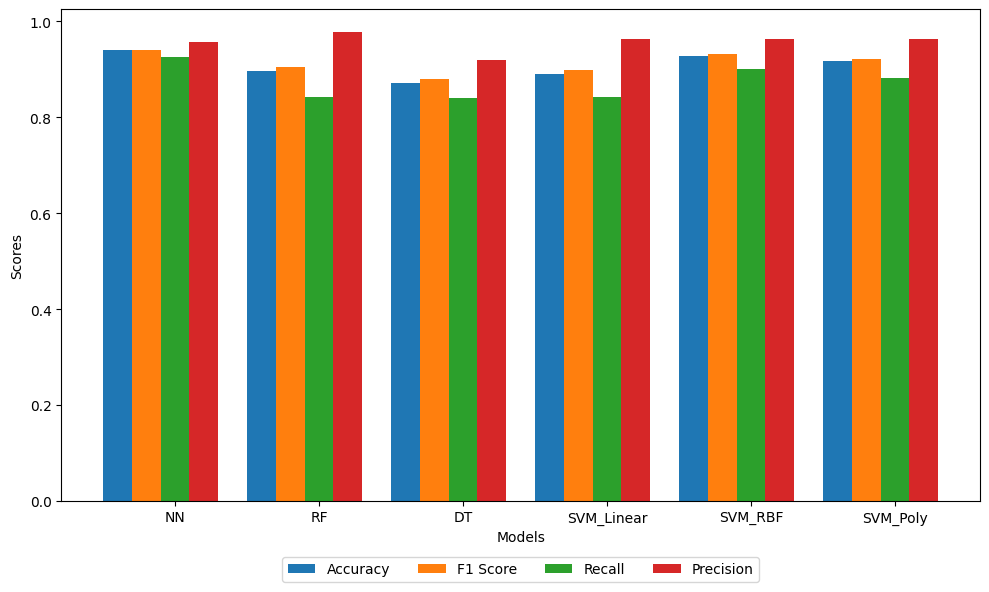

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Tạo DataFrame result
result = pd.DataFrame({
    'Model': model_list,
    'Accuracy': accuracy_list,
    'F1_Score': f1_score_list,
    'Recall': recall_list,
    'Precision': precision_list
})

# Các chỉ số cho trục x (để xác định vị trí các cột)
x = result.index

# Chiều rộng của mỗi cột
width = 0.2
plt.figure(figsize=(10, 6))
# Vẽ biểu đồ cột
plt.bar(x - 2 * width, result['Accuracy'], width, label='Accuracy')
plt.bar(x - width, result['F1_Score'], width, label='F1 Score')
plt.bar(x, result['Recall'], width, label='Recall')
plt.bar(x + width, result['Precision'], width, label='Precision')

# Đặt nhãn cho trục x và trục y
plt.xlabel('Models')
plt.ylabel('Scores')

# Đặt tên cho các cột
plt.xticks(x, result['Model'], rotation='horizontal')

# Hiển thị chú thích
legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

# Hiển thị biểu đồ cột
plt.tight_layout()
plt.show()

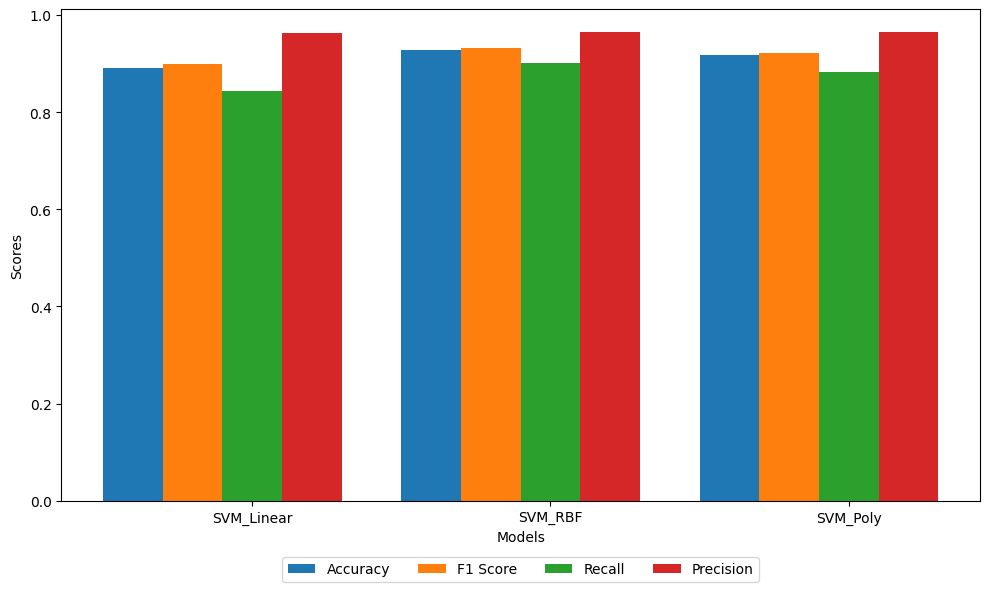

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Tạo DataFrame result
result = pd.DataFrame({
    'Model': model_list[3:],
    'Accuracy': accuracy_list[3:],
    'F1_Score': f1_score_list[3:],
    'Recall': recall_list[3:],
    'Precision': precision_list[3:]
})

# Các chỉ số cho trục x (để xác định vị trí các cột)
x = result.index

# Chiều rộng của mỗi cột
width = 0.2
plt.figure(figsize=(10, 6))
# Vẽ biểu đồ cột
plt.bar(x - 2 * width, result['Accuracy'], width, label='Accuracy')
plt.bar(x - width, result['F1_Score'], width, label='F1 Score')
plt.bar(x, result['Recall'], width, label='Recall')
plt.bar(x + width, result['Precision'], width, label='Precision')

# Đặt nhãn cho trục x và trục y
plt.xlabel('Models')
plt.ylabel('Scores')

# Đặt tên cho các cột
plt.xticks(x, result['Model'], rotation='horizontal')

# Hiển thị chú thích
legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

# Hiển thị biểu đồ cột
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Accuracy')

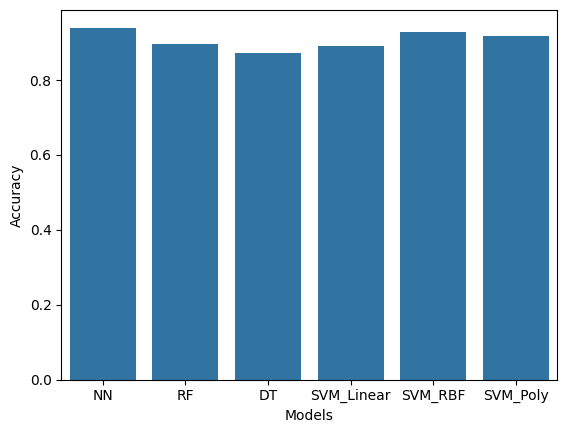

In [47]:
sns.barplot(x=model_list, y=accuracy_list)
plt.xlabel('Models')
plt.ylabel('Accuracy')

Text(0, 0.5, 'F1_Score')

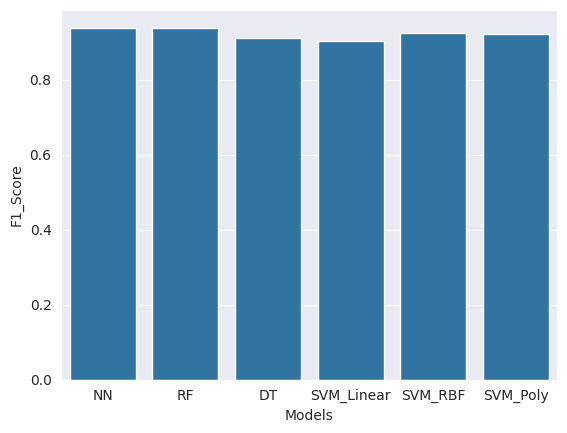

In [ ]:
sns.barplot(x=model_list, y=f1_score_list)
plt.xlabel('Models')
plt.ylabel('F1_Score')

Text(0, 0.5, 'Recall')

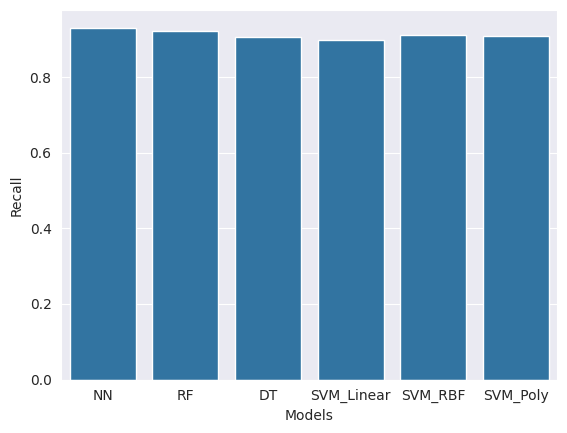

In [ ]:
sns.barplot(x=model_list, y=recall_list)
plt.xlabel('Models')
plt.ylabel('Recall')

Text(0, 0.5, 'Precision')

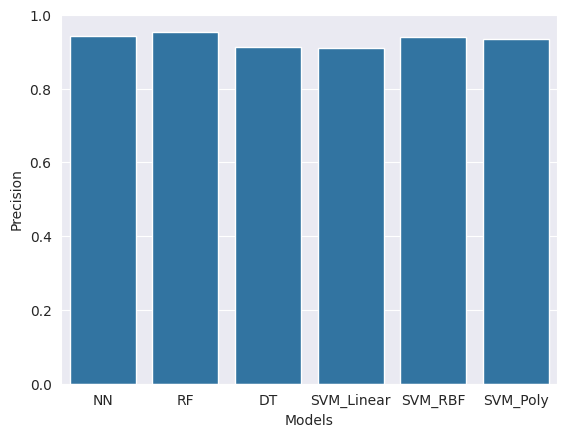

In [ ]:
sns.barplot(x=model_list, y=precision_list)
plt.xlabel('Models')
plt.ylabel('Precision')

#Choose best model

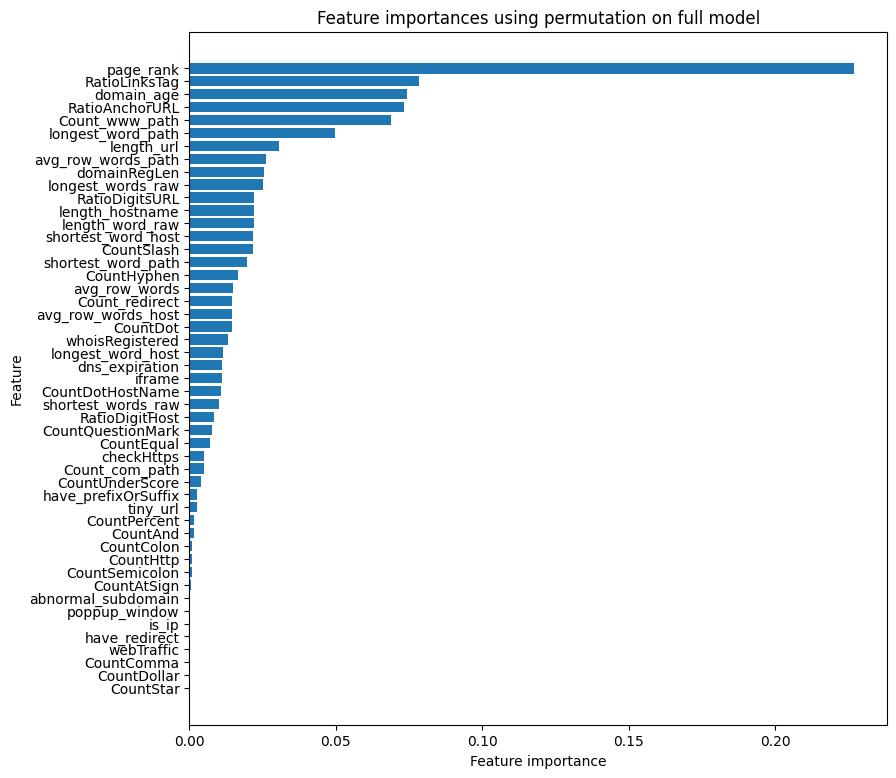

In [40]:
#checking the feature improtance in the model
plt.figure(figsize=(9,9))
n_features = X_train.shape[1]
importances = model_rf.feature_importances_
sorted_indices = np.argsort(importances)
plt.barh(range(n_features), importances[sorted_indices], align='center')
plt.yticks(np.arange(n_features), data.columns[2:][sorted_indices])
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

#Test

In [41]:

def create_vector(url):
  key = "wgowgcc4s4os0os8skw4wckw88s8wwkccwcsgcgg"
  flag = 1
  features = []
  response =""
  content =""
  text =""
  soup =""
  try:
    response = requests.get(url,timeout=5)
    content = response.content
    text = response.text
    soup = BeautifulSoup(response.text, 'html.parser')
  except:
    response = ""
    content =""
    text=""
    soup=""

  try:
    domain_name = whois.whois(urlparse(url).netloc)
  except:
    flag = 0
  features.append(fe.is_ip(url)),

  features.append(fe.length_url(url)),
  features.append(fe.length_hostname(url)),

  features.append(fe.tiny_url(url)),
  features.append(fe.countAtSign(url)),

  features.append(fe.countQuestionMark(url)),
  features.append(fe.countHyphen(url)),

  features.append(fe.countDot(url)),
  features.append(fe.countComma(url)),

  features.append(fe.countSemicolon(url)),
  features.append(fe.countDollar(url)),
  features.append(fe.countAnd(url)),

  features.append(fe.countSlash(url)),
  features.append(fe.have_redirect(url)),

  features.append(fe.CountEqual(url)),
  features.append(fe.CountPercent(url)),

  features.append(fe.CountUnderScore(url)),
  features.append(fe.CountDotHostName(url)),

  features.append(fe.CountColon(url)),
  features.append(fe.CountStar(url)),

  features.append(fe.CountHttp(url)),
  features.append(fe.check_https_protocol(url)),

  features.append(fe.RatioDigitsInHostname(url)),
  features.append(fe.RatioDigitsURL(url)),

  features.append(fe.have_prefixOrSuffix(url)),
  features.append(fe.dns_expiration(url)),

  features.append(fe.web_forwarding(response)),
  features.append(fe.page_rank(key,url)),

  features.append(0 if flag==0 else fe.DomainAge(domain_name)),
  features.append(0 if flag==0 else fe.DomainRegLen(domain_name)),
  features.append(fe.LinksInScriptTags(soup,url)),
  features.append(fe.AnchorURL(soup,url)),
  features.append(fe.popup_window(content)),
  features.append(fe.abnormal_subdomain(url)),
  features.append(fe.iframe(text)),

  features.append(fe.count_www_path(url)),
  features.append(fe.count_com_path(url)),
  features.append(fe.length_word_raw(url)),

  features.append(fe.average_word_length(fe.raw_words(url))),
  features.append(fe.average_word_length(fe.raw_words_host(url))),
  features.append(fe.average_word_length(fe.raw_words_path(url))),

  features.append(fe.longest_word_length(fe.raw_words(url))),
  features.append(fe.longest_word_length(fe.raw_words_host(url))),
  features.append(fe.longest_word_length(fe.raw_words_path(url))),

  features.append(fe.shortest_word_length(fe.raw_words(url))),
  features.append(fe.shortest_word_length(fe.raw_words_host(url))),
  features.append(fe.shortest_word_length(fe.raw_words_path(url))),
  features.append(fe.web_traffic(url)),
  features.append(fe.whois_registered_domain(url))

  return features


In [42]:
columns =[
  'is_ip',
  'length_url',
  'length_hostname',
  'tiny_url',
  'CountAtSign',
  'CountQuestionMark',
  'CountHyphen',
  'CountDot',
  'CountComma',
  'CountSemicolon',
  'CountDollar',
  'CountAnd',
  'CountSlash',
  'have_redirect',
  'CountEqual',
  'CountPercent',
  'CountUnderScore',
  'CountDotHostName',
  'CountColon',
  'CountStar',
  'CountHttp',
  'checkHttps',
  'RatioDigitHost',
  'RatioDigitsURL',
  'have_prefixOrSuffix',
  'dns_expiration',
  'Count_redirect',
  'page_rank',
  'domain_age',
  'domainRegLen',
  'RatioLinksTag',
  'RatioAnchorURL',
  'poppup_window',
  'abnormal_subdomain',
  'iframe',
  'Count_www_path',
  'Count_com_path',
  'length_word_raw',
  'avg_row_words',
  'avg_row_words_host',
  'avg_row_words_path',
  'longest_words_raw',
  'longest_word_host',
  'longest_word_path',
  'shortest_words_raw',
  'shortest_word_host',
  'shortest_word_path',
  'webTraffic',
  'whoisRegistered',

]

In [43]:
url = ['https://www.google.com/', 'http://205.174.165.80/CICDataset/ISCX-URL-2016/',
       'https://kotaku.com/the-witcher-3-wild-hunt-the-kotaku-review-1703766283',
       'http://docs.python.org:80/3/library/urllib.parse.html?',

       	'https://usps.address-shipwatchers.shop/',
       'https://grtakeprize.com/it/bp4f/index?c=2277&affId=BC6DC089&c1=48&c2=1opCaODZewbK&c3=1c1e607843434706847313349c7444a0&c4=&c7=&c5=&c8=&c6=&i1=&t1=',
       'https://t.ly/EWZo9','http://fis-lab.com/wp-includes/images/smilies/front/wwpp/',

       'https://www.kaggle.com/busrabetulcavusoglu/', 'https://www.tdtu.edu.vn']

In [44]:
url_list = []
for i in url:
  url_list.append(create_vector(i))

Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
Error trying to connect to socket: closing socket - [Errno -2] Name or service not known


In [45]:
df = pd.DataFrame(url_list, columns= columns)

In [46]:
df

,is_ip,length_url,length_hostname,tiny_url,CountAtSign,CountQuestionMark,CountHyphen,CountDot,CountComma,CountSemicolon,...,avg_row_words_host,avg_row_words_path,longest_words_raw,longest_word_host,longest_word_path,shortest_words_raw,shortest_word_host,shortest_word_path,webTraffic,whoisRegistered
0,0,23,14,0,0,0,0,2,0,0,...,4.500000,0.000000,6,6,0,3,3,0,1107210325,1
1,1,47,14,0,0,0,2,3,0,0,...,2.750000,4.000000,10,3,10,2,2,2,0,0
2,0,71,10,0,0,0,8,1,0,0,...,6.000000,4.888889,10,6,10,1,6,1,2074472,1
3,0,54,15,0,0,1,0,4,0,0,...,5.000000,4.600000,7,6,7,1,4,1,12225752,1
4,0,39,30,0,0,0,1,2,0,0,...,7.666667,0.000000,12,12,0,4,4,0,0,1
5,0,145,15,0,0,1,0,1,0,0,...,11.000000,4.750000,32,11,32,1,11,1,0,1
6,0,18,4,0,0,0,0,1,0,0,...,1.000000,5.000000,5,1,5,1,1,5,600140,1
7,0,57,11,0,0,0,2,1,0,0,...,3.000000,5.333333,8,3,8,2,3,2,0,0
8,0,43,14,0,0,0,0,2,0,0,...,4.500000,19.000000,19,6,19,3,3,19,1711869,1
9,0,23,15,0,0,0,0,3,0,0,...,3.500000,0.000000,4,4,0,3,3,0,25847,0


In [47]:
new_data_normalized = scaler.transform(df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


#Predict

In [48]:
rf_predict = model_rf.predict(new_data_normalized)

In [49]:
result = rf_predict.tolist()

In [50]:
expected = [0, 1, 0, 0, 1, 1, 1, 1, 0, 0]

In [51]:
combine = {'url': url, 'predict': result, 'expected': expected}

In [52]:
df_predict = pd.DataFrame(combine)

In [53]:
df_predict

,url,predict,expected
0,https://www.google.com/,0,0
1,http://205.174.165.80/CICDataset/ISCX-URL-2016/,1,1
2,https://kotaku.com/the-witcher-3-wild-hunt-the...,0,0
3,http://docs.python.org:80/3/library/urllib.par...,1,0
4,https://usps.address-shipwatchers.shop/,1,1
5,https://grtakeprize.com/it/bp4f/index?c=2277&a...,1,1
6,https://t.ly/EWZo9,1,1
7,http://fis-lab.com/wp-includes/images/smilies/...,1,1
8,https://www.kaggle.com/busrabetulcavusoglu/,0,0
9,https://www.tdtu.edu.vn,0,0


In [55]:
import joblib
filename= 'saved_model.sav'
saved_model=joblib.dump(model_rf,filename)